전체 annotation에서 metal을 포함하는 data만 뽑기

In [1]:
import pandas as pd

# 파일 경로
file_path = '/home/qkrgangeun/LigMet/Nonredund_annotations.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# metals 목록
metals = ["MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"]

# metals을 포함하는 Ligand ID가 있는 PDB ID 찾기
pdb_ids_with_metals = df[df['Ligand ID'].isin(metals)]['PDB ID'].unique()

# 해당 PDB ID를 가지고 있는 데이터만 필터링
filtered_df = df[df['PDB ID'].isin(pdb_ids_with_metals)]

# 필터링된 데이터를 새로운 CSV 파일로 저장
filtered_df.to_csv('/home/qkrgangeun/LigMet/metal_annotations.csv', index=False)


NMR data 제거

In [2]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# 데이터 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# 'Assembly Detail'이 'NMR'인 데이터 제외
filtered_df_no_nmr = filtered_df[filtered_df['Assembly Detail'] != 'NMR']

# 변경된 데이터를 새로운 파일로 저장
filtered_df_no_nmr.to_csv('/home/qkrgangeun/LigMet/metal_annotations.csv', index=False)

print("Filtered data saved as 'metal_annotations_no_nmr.csv'")


/tmp/ipykernel_51214/2062375908.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv(filtered_file_path)


Filtered data saved as 'metal_annotations_no_nmr.csv'


PDB 개수 : 17418개

In [3]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# 데이터를 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# unique PDB ID 개수 구하기
unique_pdbid_count = filtered_df['PDB ID'].nunique()

# 결과 출력
print(f"Unique PDB ID count: {unique_pdbid_count}")


Unique PDB ID count: 17418


/tmp/ipykernel_51214/2836226971.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv(filtered_file_path)


10mer 이하의 pdb만 남기기

In [4]:
import pandas as pd
import re

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'
output_file_path = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# CSV 파일 읽기
df = pd.read_csv(filtered_file_path)

# Stoichiometry에서 n-mer에서 n을 추출하고 10 이하만 필터링
def filter_stoichiometry(stoichiometry):
    match = re.search(r'(\d+)-mer', str(stoichiometry))
    if match:
        n = int(match.group(1))
        return n <= 10  # 10 이하만 남김
    return True  # n-mer 형식이 아니면 그대로 유지

df_filtered = df[df['Stoichiometry'].apply(filter_stoichiometry)]

# 새로운 파일로 저장
df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered file saved to {output_file_path}")


/tmp/ipykernel_51214/3553132695.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filtered_file_path)


Filtered file saved to /home/qkrgangeun/LigMet/metal_annotation_10mer.csv


/tmp/ipykernel_6217/946598484.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filtered_file_path)


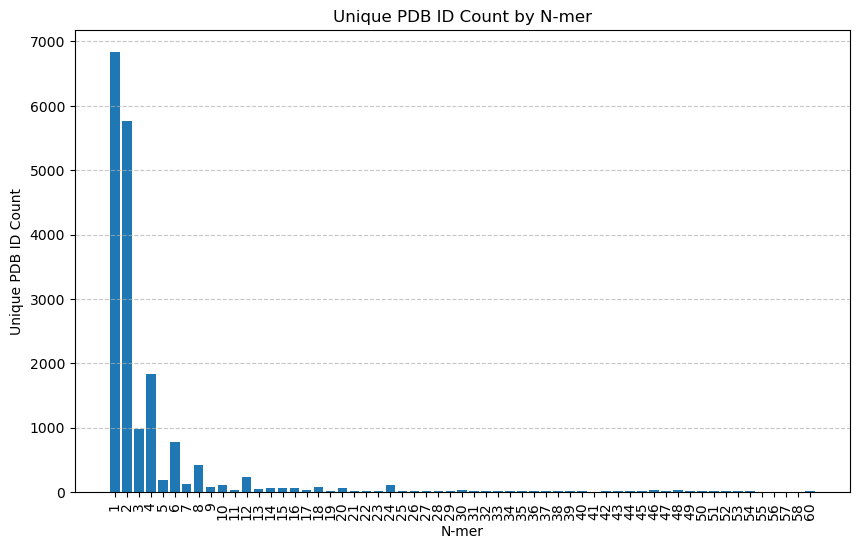

In [30]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# CSV 파일 읽기
df = pd.read_csv(filtered_file_path)

# Stoichiometry에서 n-mer에서 n을 추출 (homomer 포함)
def extract_n_mer(stoichiometry):
    if isinstance(stoichiometry, str):
        if "monomer" in stoichiometry.lower():
            return 1
        match = re.search(r'(\d+)-mer', stoichiometry)
        if match:
            return int(match.group(1))
    return None

df["n_mer"] = df["Stoichiometry"].apply(extract_n_mer)

# n_mer 값별 unique PDB ID 개수 계산
n_mer_counts = df.groupby("n_mer")["PDB ID"].nunique().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(n_mer_counts.index.astype(str), n_mer_counts.values)
plt.xlabel("N-mer")
plt.ylabel("Unique PDB ID Count")
plt.title("Unique PDB ID Count by N-mer")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


10mer 이하 pdb: 16204개

In [7]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# 데이터를 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# unique PDB ID 개수 구하기
unique_pdbid_count = filtered_df['PDB ID'].nunique()

# 결과 출력
print(f"Unique PDB ID count: {unique_pdbid_count}")


Unique PDB ID count: 16204


In [14]:
import os
import pandas as pd

# Define directories
ligand_dir = '/home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb'
receptor_dir = '/home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/rec_pdb'
file = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# Load the CSV with Assembly IDs
df = pd.read_csv(file)

# Create a directory to store merged PDB files
output_dir = '/home/qkrgangeun/LigMet/data/'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the unique PDB IDs
for pdb_id in df['PDB ID'].unique():
    # Get all ligands corresponding to this pdb_id
    ligands = df[df['PDB ID'] == pdb_id]['Ligand Detail'].unique()
    
    # Get all receptors corresponding to this pdb_id
    receptors = df[df['PDB ID'] == pdb_id]['Assembly ID'].unique()
    
    # Create the output file path for merged PDB
    merged_file = os.path.join(output_dir, f"{pdb_id}_merged.pdb")
    
    with open(merged_file, 'w') as merged_f:
        # Write all receptor files
        for receptor in receptors:
            receptor_file = os.path.join(receptor_dir, f"{receptor}.pdb")
            
            # Check if the receptor file exists
            if os.path.exists(receptor_file):
                with open(receptor_file, 'r') as receptor_f:
                    merged_f.write(receptor_f.read())

            else:
                print(f"Missing receptor file: {receptor_file}")
        
        # Write all ligand files
        for ligand in ligands:
            ligand_file = os.path.join(ligand_dir, f"{ligand}.pdb")
            
            # Check if the ligand file exists
            if os.path.exists(ligand_file):
                with open(ligand_file, 'r') as ligand_f:
                    merged_f.write(ligand_f.read())
                # Add a separator between ligands (optional)

            else:
                print(f"Missing ligand file: {ligand_file}")
    
    # print(f"Merged {pdb_id} into {pdb_id}_merged.pdb")


Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1l9h_2_kmer_1_E.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1ob2_1_kmer_1_C.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_2_kmer_1_R.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_11_kmer_1_R2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_11_kmer_1_Q1.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2e3x_2_kmer_1_E2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_C4.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_C3.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_D2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/

PDB + biolip metal

In [ ]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

for pdb in os.listdir(biolip_dir):
    if not pdb.endswith("_merged.pdb"):  # 잘못된 파일 필터링
        continue
    
    pdb_id = pdb.replace("_merged.pdb", "")
    os.chdir(pdb_dir)  # 디렉토리 이동
    
    # PDB 다운로드 명령 실행
    os.system(f"pdb_get {pdb_id}")
    
    biolip_path = biolip_dir / pdb
    pdb_path = pdb_dir / f"{pdb_id}.pdb"
    processed_path = processed_dir / f"{pdb_id}.pdb"
    
    if not pdb_path.exists():  # 다운로드 실패 방지
        print(f"Warning: {pdb_id}.pdb not found in {pdb_dir}")
        continue
    
    with open(biolip_path, 'r') as b, open(pdb_path, 'r') as p, open(processed_path, 'w') as file:
        biolip_text = b.read()
        
        for line in p:
            if line.startswith('ATOM'):
                if line in biolip_text:
                    file.write(line)
            elif line.startswith('HETATM'):
                atom_elem = line[76:78].strip()  # 원소명 위치 수정
                res_name = line[17:20].strip()  # 리간드명 위치 수정
                
                if atom_elem in metals:
                    if line in biolip_text:
                        file.write(line)
                elif res_name != 'HOH':
                    file.write(line)


pdb_get 안되는 PDB: 187

In [1]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

# Biolip에 있는 PDB ID 추출
biolip_pdb_ids = {p.stem.replace("_merged", "") for p in biolip_dir.glob("*_merged.pdb")}

# PDB 디렉토리에 있는 PDB ID 추출
pdb_pdb_ids = {p.stem for p in pdb_dir.glob("*.pdb")}

# 없는 PDB ID 찾기 및 다운로드
missing_pdb_ids = biolip_pdb_ids - pdb_pdb_ids
print(missing_pdb_ids)
# for pdb_id in missing_pdb_ids:
#     os.chdir(pdb_dir)  # 디렉토리 이동
#     os.system(f"pdb_get {pdb_id}")

{'7u0l', '8sz8', '7b2t', '8ovs', '6z6b', '7pxb', '6gua', '8atj', '7a26', '7ah2', '6p7n', '8tvi', '7qan', '7an1', '7p7w', '7bkx', '7t8n', '7plr', '7aks', '7pzh', '8g32', '7p24', '6yq9', '8bbz', '9ayj', '7ahz', '8ekk', '7zc0', '7r5t', '8pmg', '7oyk', '7t3q', '7b6v', '8pqy', '7dwx', '9avg', '7atk', '8oru', '7md2', '8ci0', '7oz9', '7nzq', '7xi9', '7nb3', '6y9i', '7oza', '8bjp', '7pi1', '7blh', '8f1e', '7od0', '8xvf', '7r1o', '5exc', '7pwi', '6tsp', '8eaq', '8xfr', '8g8p', '6yak', '8igw', '6tt9', '7anb', '7uc3', '7nt0', '7ova', '7bgo', '7ze9', '6wfj', '6tu7', '8jif', '8jpg', '6qsx', '7nyd', '7pmz', '7ne9', '8agd', '5euj', '6ss4', '6zk0', '8acq', '7t3p', '8eey', '7b4o', '8aeh', '4v7n', '7pi4', '8dcm', '6yxm', '6vgs', '6t1a', '7nrr', '7mks', '8atx', '8bd6', '7z6t', '8cb2', '6t2n', '7pl5', '7zgy', '7os3', '8col', '6xxg', '8ap0', '6z3o', '8rty', '8vl7', '7eiz', '8pvs', '7a9g', '6tmm', '7z4o', '4v4d', '7bl1', '6tn1', '7ok6', '7okr', '7zg8', '8b0f', '8wwv', '4wsn', '6to5', '7pq9', '6xi1', '8amt',

wget 해보려고 했으나, not found

In [ ]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

# Biolip에 있는 PDB ID 추출
biolip_pdb_ids = {p.stem.replace("_merged", "") for p in biolip_dir.glob("*_merged.pdb")}

# PDB 디렉토리에 있는 PDB ID 추출
pdb_pdb_ids = {p.stem for p in pdb_dir.glob("*.pdb")}

# 없는 PDB ID 찾기 및 다운로드
missing_pdb_ids = biolip_pdb_ids - pdb_pdb_ids

os.chdir(pdb_dir)  # 디렉토리 이동
for pdb_id in missing_pdb_ids:
    print(f"wget {pdb_id}.pdb")
    os.system(f"wget https://files.rcsb.org/download/{pdb_id}.pdb")

wget 7u0l.pdb


--2025-02-18 12:56:05--  https://files.rcsb.org/download/7u0l.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-18 12:56:07 ERROR 404: Not Found.

--2025-02-18 12:56:07--  https://files.rcsb.org/download/8sz8.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.7, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 8sz8.pdb


404 Not Found
2025-02-18 12:56:09 ERROR 404: Not Found.

--2025-02-18 12:56:09--  https://files.rcsb.org/download/7b2t.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.7, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 7b2t.pdb


404 Not Found
2025-02-18 12:56:12 ERROR 404: Not Found.

--2025-02-18 12:56:12--  https://files.rcsb.org/download/8ovs.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.14, 3.168.178.46, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.14|:443... connected.
HTTP request sent, awaiting response... 

wget 8ovs.pdb


404 Not Found
2025-02-18 12:56:14 ERROR 404: Not Found.

--2025-02-18 12:56:14--  https://files.rcsb.org/download/6z6b.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.14, 3.168.178.46, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.14|:443... connected.
HTTP request sent, awaiting response... 

wget 6z6b.pdb


404 Not Found
2025-02-18 12:56:16 ERROR 404: Not Found.

--2025-02-18 12:56:16--  https://files.rcsb.org/download/7pxb.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 7pxb.pdb


404 Not Found
2025-02-18 12:56:18 ERROR 404: Not Found.

--2025-02-18 12:56:18--  https://files.rcsb.org/download/6gua.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.7, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 6gua.pdb


404 Not Found
2025-02-18 12:56:21 ERROR 404: Not Found.

--2025-02-18 12:56:21--  https://files.rcsb.org/download/8atj.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 8atj.pdb


404 Not Found
2025-02-18 12:56:23 ERROR 404: Not Found.

--2025-02-18 12:56:23--  https://files.rcsb.org/download/7a26.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.7, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7a26.pdb


404 Not Found
2025-02-18 12:56:25 ERROR 404: Not Found.

--2025-02-18 12:56:25--  https://files.rcsb.org/download/7ah2.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.46, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7ah2.pdb


404 Not Found
2025-02-18 12:56:27 ERROR 404: Not Found.

--2025-02-18 12:56:27--  https://files.rcsb.org/download/6p7n.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.46, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 6p7n.pdb
wget 8tvi.pdb


--2025-02-18 12:56:29--  https://files.rcsb.org/download/8tvi.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-18 12:56:31 ERROR 404: Not Found.

--2025-02-18 12:56:31--  https://files.rcsb.org/download/7qan.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.46, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7qan.pdb


404 Not Found
2025-02-18 12:56:34 ERROR 404: Not Found.

--2025-02-18 12:56:34--  https://files.rcsb.org/download/7an1.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7an1.pdb


404 Not Found
2025-02-18 12:56:36 ERROR 404: Not Found.

--2025-02-18 12:56:36--  https://files.rcsb.org/download/7p7w.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7p7w.pdb


404 Not Found
2025-02-18 12:56:38 ERROR 404: Not Found.

--2025-02-18 12:56:38--  https://files.rcsb.org/download/7bkx.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7bkx.pdb


Receptor: PDB / 
Metal: Biolip + PDB / 
Ligand: PDB

In [12]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)
list = os.makedirs(processed_dir, exist_ok=True)
# for pdb in os.listdir(pdb_dir):
for pdb in list:
    if not pdb.endswith(".pdb"):  # 잘못된 파일 필터링
        continue
    
    pdb_id = pdb.replace(".pdb", "")
    
    biolip_path = biolip_dir / f"{pdb_id}_merged.pdb"
    pdb_path = pdb_dir / f"{pdb_id}.pdb"
    processed_path = processed_dir / f"{pdb_id}.pdb"
    
    if not pdb_path.exists():  # 다운로드 실패 방지
        print(f"Warning: {pdb_id}.pdb not found in {pdb_dir}")
        continue
    
    with open(biolip_path, 'r') as b, open(pdb_path, 'r') as p, open(processed_path, 'w') as file:
        biolip_text = [line[30:81].strip() for line in b if line.startswith(('HETATM','ATOM'))]
        # print(biolip_text)
        for line in p:
            if line.startswith('ATOM'):
                if line[30:81].strip() in biolip_text:
                    file.write(line)
            elif line.startswith('HETATM'):
                atom_elem = line[76:78].strip()  # 원소명 위치 수정
                res_name = line[17:20].strip()  # 리간드명 위치 수정
                
                if atom_elem in metals:
                    if line[30:81].strip() in biolip_text:
                        file.write(line)
                elif res_name != 'HOH':
                    file.write(line)
        print(processed_path)

['87.515  98.365 143.166  1.00 87.46           N', '88.928  98.250 143.502  1.00 87.46           C', '89.176  97.047 144.404  1.00 87.46           C', '89.913  96.129 144.041  1.00 87.46           O', '89.424  99.529 144.180  1.00 87.46           C', '88.555  97.061 145.586  1.00 86.20           N', '88.738  95.964 146.531  1.00 86.20           C', '88.202  94.653 145.968  1.00 86.20           C', '88.828  93.598 146.130  1.00 86.20           O', '88.062  96.297 147.860  1.00 86.20           C', '87.042  94.698 145.307  1.00 86.35           N', '86.481  93.484 144.721  1.00 86.35           C', '87.380  92.934 143.622  1.00 86.35           C', '87.637  91.725 143.565  1.00 86.35           O', '85.078  93.762 144.182  1.00 86.35           C', '87.877  93.808 142.744  1.00 84.46           N', '88.788  93.355 141.699  1.00 84.46           C', '90.051  92.757 142.302  1.00 84.46           C', '90.529  91.710 141.850  1.00 84.46           O', '89.133  94.512 140.763  1.00 84.46           C',

Dataset 통계: Metal-Ligand PDB개수 통계
Metal-Ligand: 6067
Total: 16017

In [16]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
from Bio import PDB
import numpy as np

def check_metal_ligand_interaction(file):
    metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("structure", file)
    
    metal_positions = []
    ligand_positions = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                res_name = residue.get_resname().strip()
                if "H_" in residue.id[0]: 
                    for atom in residue:
                        atom_name = atom.element.strip().upper()
                        coord = atom.get_coord()
                        if atom_name in metals:
                            metal_positions.append(coord)
                        elif res_name != "HOH":
                            ligand_positions.append(coord)
    
    if not metal_positions or not ligand_positions:
        return False
    
    metal_positions = np.array(metal_positions)
    ligand_positions = np.array(ligand_positions)
    
    # 거리 행렬 계산 (모든 금속-리간드 조합 간 거리)
    dists = np.linalg.norm(metal_positions[:, np.newaxis] - ligand_positions, axis=2)
    np.any(dists < 3.0)
    return np.any(dists < 3.0)

def main():
    count = 0
    pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
    
    pdb_list = [pdb for pdb in os.listdir(pdb_dir) if pdb.endswith(".pdb")]
    pdb_list = ["1a0d.pdb","8imy.pdb"]
    for pdb in pdb_list:
        count += check_metal_ligand_interaction(pdb_dir/pdb)
        
    print("Metal-Ligand:",count)
    print("Total:",len(pdb_list))
main()

Metal-Ligand: 1
Total: 2


Metalsite 통계
Metal-Ligand: 21761
Total: 87117

In [27]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
from Bio import PDB
import numpy as np

def check_metal_ligand_interaction(file):
    metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("structure", file)
    
    metal_positions = []
    ligand_positions = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                res_name = residue.get_resname().strip()
                if "H_" in residue.id[0]: 
                    for atom in residue:
                        atom_name = atom.element.strip().upper()
                        coord = atom.get_coord()
                        if atom_name in metals:
                            metal_positions.append(coord)
                        elif res_name != "HOH":
                            ligand_positions.append(coord)
    
    if not ligand_positions:
        # print(f"error in {file}")
        return 0,len(metal_positions)
    
    metal_positions = np.array(metal_positions)
    ligand_positions = np.array(ligand_positions)
    
    # 거리 행렬 계산 (모든 금속-리간드 조합 간 거리)
    dists = np.linalg.norm(metal_positions[:, np.newaxis] - ligand_positions, axis=2)
    print(np.sum(np.any(dists < 3.0,axis=-1)) , len(metal_positions))
    return np.sum(np.any(dists < 3.0,axis=-1)) , len(metal_positions)

def main():
    Count = 0
    Total = 0
    pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
    
    pdb_list = [pdb for pdb in os.listdir(pdb_dir) if pdb.endswith(".pdb")]
    pdb_list = ["1a0d.pdb","8imy.pdb"]
    for pdb in pdb_list:
        count, total = check_metal_ligand_interaction(pdb_dir/pdb)
        Count += count
        Total += total
    print("Metal-Ligand:",Count)
    print("Total:",Total)
main()

MN
MN
MN
MN
MN
MN
MN
MN
MG
CA
1 2
Metal-Ligand: 1
Total: 10


mmseq 후 Cluster 번호 부여

In [1]:
import pandas as pd

# 파일 경로
file_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult_cluster.tsv"

# TSV 파일 읽기
df = pd.read_csv(file_path, sep="\t", header=None, names=["rep_chain", "chain"])

# 클러스터 번호 부여
df["cluster"] = df.groupby("rep_chain").ngroup() + 1

# 정렬
df = df.sort_values(by=["cluster", "rep_chain", "chain"])

# 클러스터 번호와 함께 출력
df_formatted = df[["cluster", "rep_chain", "chain"]]

# 클러스터 데이터프레임을 저장할 경로 설정
output_file_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv"

# TSV 파일로 저장
df_formatted.to_csv(output_file_path, sep="\t", index=False)

# 저장 완료 메시지 출력
output_file_path



'/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv'

In [43]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
import pandas as pd
import requests

def fetch_release_date(pdb_id):
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            release_date = data.get("rcsb_accession_info", {}).get("initial_release_date", "Unknown")
            return release_date.split("T")[0].replace("-", "")  # T 이후 제거 및 YYYYMMDD 형식 변환
        else:
            return "Unknown"
    except Exception as e:
        return "Unknown"

def extract_fasta_info(fasta_dir, cluster_file):
    fasta_files = [f for f in os.listdir(fasta_dir) if f.endswith(".fasta")]
    # fasta_files = ["966c.fasta"]
    cluster_df = pd.read_csv(cluster_file, sep="\t")
    
    pdb_info_list = []
    
    for fasta_file in fasta_files:
        pdb_id = fasta_file.replace(".fasta", "")
        fasta_path = os.path.join(fasta_dir, fasta_file)
        
        with open(fasta_path, "r") as f:
            lines = f.readlines()
            chains = [line.split(":")[-1].strip() for line in lines if line.startswith(">")]
        
        cluster_data = cluster_df[cluster_df["chain"].str.startswith(pdb_id)]
        clusters = cluster_data["cluster"].unique().tolist()
        
        release_date = fetch_release_date(pdb_id)
        pdb_info_list.append([pdb_id, chains, clusters, release_date])
    
    return pdb_info_list

def main():
    fasta_dir = Path("/home/qkrgangeun/LigMet/data/fasta")
    cluster_file = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/cluster.tsv"
    output_csv = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/pdb_info.csv"
    
    pdb_info = extract_fasta_info(fasta_dir, cluster_file)
    
    # DataFrame으로 변환 후 저장
    df = pd.DataFrame(pdb_info, columns=["pdb_id", "chains", "clusters", "release_date"])
    df.to_csv(output_csv, index=False)
    
    print(f"CSV 파일 저장 완료: {output_csv}")

if __name__ == "__main__":
    main()

CSV 파일 저장 완료: /home/qkrgangeun/LigMet/code/scripts/dataset/split/pdb_info.csv


In [ ]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
import pandas as pd

def extract_release_date_from_pdb(pdb_id, pdb_dir):
    pdb_file = os.path.join(pdb_dir, f"{pdb_id}.pdb")
    if not os.path.exists(pdb_file):
        print(1)
        return "Unknown"
    
    try:
        with open(pdb_file, "r") as f:
            for line in f:
                if line.startswith("REVDAT   1"):
                    date_parts = line[12:23].strip().split("-")
                    if len(date_parts) == 3:
                        day, month, year = date_parts
                        month_dict = {
                            "JAN": "01", "FEB": "02", "MAR": "03", "APR": "04", "MAY": "05", "JUN": "06",
                            "JUL": "07", "AUG": "08", "SEP": "09", "OCT": "10", "NOV": "11", "DEC": "12"
                        }
                        year_full = f"19{year}" if int(year) >= 26 else f"20{year}"
                        formatted_date = f"{year_full}{month_dict.get(month.upper(), '00')}{day.zfill(2)}"
                        print(formatted_date)
                        return formatted_date

    except Exception as e:
        print(f"Error reading file {pdb_file}: {e}")

    return "Unknown"

def process_fasta(fasta_file, fasta_dir, cluster_df, pdb_dir):
    pdb_id = fasta_file.replace(".fasta", "")
    fasta_path = os.path.join(fasta_dir, fasta_file)
    
    with open(fasta_path, "r") as f:
        lines = f.readlines()
        chains = [line.split(":")[-1].strip() for line in lines if line.startswith(">")]
    
    cluster_data = cluster_df[cluster_df["chain"].str.startswith(pdb_id)]
    clusters = cluster_data["cluster"].tolist()
    
    release_date = extract_release_date_from_pdb(pdb_id, pdb_dir)
    
    return [pdb_id, chains, clusters, release_date]

def extract_fasta_info(fasta_dir, cluster_file, pdb_dir):
    fasta_files = [f for f in os.listdir(fasta_dir) if f.endswith(".fasta")]
    cluster_df = pd.read_csv(cluster_file, sep="\t")
    
    with Pool(processes=cpu_count()) as pool:
        pdb_info_list = pool.starmap(process_fasta, [(f, fasta_dir, cluster_df, pdb_dir) for f in fasta_files])
    
    return pdb_info_list

def main():
    fasta_dir = Path("/home/qkrgangeun/LigMet/data/biolip/fasta")
    cluster_file = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv"
    pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
    output_csv = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate.csv"
    
    pdb_info = extract_fasta_info(fasta_dir, cluster_file, pdb_dir)
    
    # DataFrame으로 변환 후 저장
    df = pd.DataFrame(pdb_info, columns=["pdb_id", "chains", "clusters", "release_date"])
    df.to_csv(output_csv, index=False)
    
    print(f"CSV 파일 저장 완료: {output_csv}")

if __name__ == "__main__":
    main()

pdb_info.csv: pdb_id,chains,clusters,release_date 를 release_date로 sort

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# release_date 컬럼을 기준으로 정렬 (오름차순)
df_sorted = df.sort_values(by="release_date", ascending=True)

# 정렬된 데이터를 새로운 CSV 파일로 저장
sorted_file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
df_sorted.to_csv(sorted_file_path, index=False)

print(f"정렬된 CSV 파일이 저장되었습니다: {sorted_file_path}")


정렬된 CSV 파일이 저장되었습니다: /home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv


In [2]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
cutoff_date = 20210331

# 기준일을 기준으로 데이터 분할
df_before = df[df["release_date"] <= cutoff_date]  # 기준일 이하 데이터
df_after = df[df["release_date"] > cutoff_date]   # 기준일 초과 데이터

# 기준일 이하 데이터에서 unique cluster 추출
unique_clusters_before = set()
for clusters in df_before["clusters"]:
    unique_clusters_before.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# 기준일 초과 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_after = df_after[df_after["clusters"].apply(lambda x: all(c not in unique_clusters_before for c in eval(x)))]

# 결과 저장
filtered_file_path = "/home/qkrgangeun/LigMet/code/text/biolip/filtered_pdbs.csv"
filtered_df_after.to_csv(filtered_file_path, index=False)

print(f"필터링된 CSV 파일이 저장되었습니다: {filtered_file_path}")


필터링된 CSV 파일이 저장되었습니다: /home/qkrgangeun/LigMet/code/text/biolip/filtered_pdbs.csv


In [4]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
train_cutoff_date = 20190101
val_cutoff_date = 20210331

# 기준일을 기준으로 데이터 분할
df_train = df[df["release_date"] <= train_cutoff_date]  # 기준일 이하 데이터 (training)
df_val = df[(df["release_date"] > train_cutoff_date) & (df["release_date"] <= val_cutoff_date)]  # 기준일 초과 데이터 (validation)

# Training 데이터에서 unique cluster 추출
unique_clusters_train = set()
for clusters in df_train["clusters"]:
    unique_clusters_train.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# Validation 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_val = df_val[df_val["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# PDB ID만 추출하여 텍스트 파일로 저장
train_pdbs = df_train["pdb_id"].tolist()
val_pdbs = filtered_df_val["pdb_id"].tolist()

# 파일 저장 경로
train_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt"
val_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt"

# 텍스트 파일로 저장
with open(train_txt_path, "w") as f:
    f.write("\n".join(train_pdbs))

with open(val_txt_path, "w") as f:
    f.write("\n".join(val_pdbs))

(train_txt_path, val_txt_path)


('/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt')

In [6]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
train_cutoff_date = 20190101
val_cutoff_date = 20210331

# Training, Validation, Test 데이터 분할
df_train = df[df["release_date"] <= train_cutoff_date]  # Training 데이터
df_val = df[(df["release_date"] > train_cutoff_date) & (df["release_date"] <= val_cutoff_date)]  # Validation 데이터
df_test = df[df["release_date"] > val_cutoff_date]  # Test 데이터

# Training 데이터에서 unique cluster 추출
unique_clusters_train = set()
for clusters in df_train["clusters"]:
    unique_clusters_train.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# Validation 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_val = df_val[df_val["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# Test 데이터에서도 unique cluster와 겹치는 PDB 제거
filtered_df_test = df_test[df_test["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# PDB ID만 추출하여 리스트 생성
train_pdbs = df_train["pdb_id"].tolist()
val_pdbs = filtered_df_val["pdb_id"].tolist()
test_pdbs = filtered_df_test["pdb_id"].tolist()

# PDB 개수 출력
print(f"Training PDB 개수: {len(train_pdbs)}")
print(f"Validation PDB 개수: {len(val_pdbs)}")
print(f"Test PDB 개수: {len(test_pdbs)}")

# 파일 저장 경로
train_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt"
val_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt"
test_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt"

# 텍스트 파일로 저장
with open(train_txt_path, "w") as f:
    f.write("\n".join(train_pdbs))

with open(val_txt_path, "w") as f:
    f.write("\n".join(val_pdbs))

with open(test_txt_path, "w") as f:
    f.write("\n".join(test_pdbs))

(train_txt_path, val_txt_path, test_txt_path)


Training PDB 개수: 33645
Validation PDB 개수: 1148
Test PDB 개수: 1771


('/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt')

In [45]:
import re

# 파일 경로
error_file_path = "/home/qkrgangeun/LigMet/error.txt"
output_file_path = "/home/qkrgangeun/LigMet/error_pdb.txt"

# PDB ID 추출을 위한 정규 표현식 패턴 (리간드 & 리셉터)
ligand_pattern = re.compile(r'/lig_pdb/([0-9a-zA-Z]{4})_')
receptor_pattern = re.compile(r'/rec_pdb/([0-9a-zA-Z]{4})\.pdb')

# PDB ID 저장을 위한 집합 (unique 값 저장)
unique_pdb_ids = set()

# 에러 파일 읽기 및 PDB ID 추출
with open(error_file_path, "r") as file:
    for line in file:
        ligand_match = ligand_pattern.search(line)
        receptor_match = receptor_pattern.search(line)
        
        if ligand_match:
            unique_pdb_ids.add(ligand_match.group(1))
        if receptor_match:
            unique_pdb_ids.add(receptor_match.group(1))

# 유니크한 PDB ID 저장
with open(output_file_path, "w") as file:
    for pdb_id in sorted(unique_pdb_ids):
        file.write(pdb_id + "\n")

# 결과 파일 경로 반환
output_file_path


'/home/qkrgangeun/LigMet/error_pdb.txt'

In [46]:
import pandas as pd

# 파일 경로 설정
pdb_dir = "/home/qkrgangeun/LigMet/data/pdb"
csv_file_path = "/home/qkrgangeun/LigMet/metal_annotation_10mer.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# Stoichiometry에서 N 값 추출하는 함수
import re

def extract_n_from_stoichiometry(stoichiometry):
    if isinstance(stoichiometry, str):
        if "monomer" in stoichiometry.lower():
            return 1
        match = re.search(r'(\d+)-mer', stoichiometry)
        if match:
            return int(match.group(1))
    return None

df["N"] = df["Stoichiometry"].apply(extract_n_from_stoichiometry)

# PDB 파일에서 unique Chain 개수 계산
def count_unique_chains(pdb_file):
    unique_chains = set()
    try:
        with open(pdb_file, "r") as f:
            for line in f:
                if line.startswith("SEQRES"):
                    chain = line[10:14].strip()
                    unique_chains.add(chain)
        return len(unique_chains)
    except Exception as e:
        return None

# PDB ID, unique chain 개수(n), Stoichiometry의 N 값 저장
pdb_info_list = []

for pdb_id in df["PDB ID"].unique():
    pdb_file = f"{pdb_dir}/{pdb_id}.pdb"
    n = count_unique_chains(pdb_file)
    N = df.loc[df["PDB ID"] == pdb_id, "N"].values[0] if not df.loc[df["PDB ID"] == pdb_id, "N"].isnull().all() else None
    pdb_info_list.append([pdb_id, n, N])

# DataFrame 변환
pdb_info_df = pd.DataFrame(pdb_info_list, columns=["PDB ID", "n", "N"])

# n > N인 PDB ID 추출
filtered_pdb_ids = pdb_info_df[pdb_info_df["n"] > pdb_info_df["N"]]["PDB ID"].tolist()

print(len(filtered_pdb_ids))


6131


In [47]:
# 저장할 파일 경로 설정
output_csv_path = "/home/qkrgangeun/LigMet/pdb_info_with_chains.csv"

# DataFrame을 CSV로 저장
pdb_info_df.to_csv(output_csv_path, index=False)
output_csv_path

'/home/qkrgangeun/LigMet/pdb_info_with_chains.csv'

#######Biolip#######

In [48]:
import pandas as pd

# 파일 경로 설정
biolip_file_path = "/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/BioLiP.txt"

# 사용할 금속 원소 리스트
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# BioLiP 데이터 로드
df = pd.read_csv(biolip_file_path, sep="\t", header=None, low_memory=False)

# 금속 원소 포함하는 행 필터링 (5번째 열이 리간드명)
filtered_df = df[df[4].isin(metals)]

# Unique PDB ID 개수 계산 (1번째 열이 PDB ID)
unique_pdb_count = filtered_df[0].nunique()

# 결과 출력
unique_pdb_count


50803

In [49]:
print(filtered_df)

          0  1     2     3   4  5   6                        7   \
19      117e  A  2.15  BS01  MN  A   1      D115 E117 D120 D152   
20      117e  A  2.15  BS02  MN  A   2                E117 D120   
21      117e  A  2.15  BS03  MN  A   3                D147 D152   
24      117e  B  2.15  BS01  MN  B   1  D1115 E1117 D1120 D1152   
25      117e  B  2.15  BS02  MN  B   2        Y1093 E1117 D1120   
...      ... ..   ...   ...  .. ..  ..                      ...   
861192  9xim  B  2.40  BS03  MN  B   2      E217 H220 D255 D257   
861194  9xim  C  2.40  BS02  MN  C   1      E181 E217 D245 D292   
861195  9xim  C  2.40  BS03  MN  C   2      E217 H220 D255 D257   
861197  9xim  D  2.40  BS02  MN  D   1      E181 E217 D245 D292   
861198  9xim  D  2.40  BS03  MN  D   2      E217 H220 D255 D257   

                         8   \
19      D115 E117 D120 D152   
20                E117 D120   
21                D147 D152   
24      D115 E117 D120 D152   
25            Y93 E117 D120   
...      

In [53]:
output_csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 필요한 컬럼 선택 (1, 2, 5, 6, 7번째 컬럼) 및 컬럼명 지정
filtered_columns_df = filtered_df.iloc[:, [0, 1, 4, 5, 6]]
filtered_columns_df.columns = ["PDB ID", "Receptor chain", "Ligand", "Ligand chain", "Ligand Number"]

# CSV 파일로 저장
filtered_columns_df.to_csv(output_csv_path, index=False)

# 저장된 파일 경로 반환
output_csv_path


'/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv'

In [65]:
import os
import pandas as pd
from pathlib import Path
# 디렉토리 설정
receptor_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/receptor")
ligand_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/ligand")
merge_dir = Path("/home/qkrgangeun/LigMet/data/biolip/merged")
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 출력 디렉토리 생성
merge_dir.mkdir(parents=True, exist_ok=True)

# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = df["PDB ID"].unique()
unique_pdb_ids = ['1l9h']
# PDB 파일 병합
for pdb_id in unique_pdb_ids:
    merged_pdb_path = merge_dir / f"{pdb_id}.pdb"
    
    # Receptor 파일들 찾기 (예: 1a0dA.pdb, 1a0dB.pdb 등)
    receptor_files = list(receptor_dir.glob(f"{pdb_id}*.pdb"))
    
    with open(merged_pdb_path, "w") as merged_pdb:
        # Receptor PDB 파일들 병합
        for receptor_file in receptor_files:
            with open(receptor_file, "r") as r_file:
                for line in r_file:
                    if not line.startswith("TER"):  # "TER" 제거
                        merged_pdb.write(line)

        # Ligand PDB 파일 병합
        ligand_entries = df[df["PDB ID"] == pdb_id]
        for _, row in ligand_entries.iterrows():
            ligand_pdb_path = ligand_dir / f"{row['PDB ID']}_{row['Ligand']}_{row['Ligand chain']}_{row['Ligand Number']}.pdb"
            
            if ligand_pdb_path.exists():
                with open(ligand_pdb_path, "r") as l_file:
                    for line in l_file:
                        if not line.startswith("TER"):  # "TER" 제거
                            merged_pdb.write(line)

# 완료 메시지 출력
    print(merged_pdb_path)


/home/qkrgangeun/LigMet/data/biolip/merged/1l9h.pdb


In [61]:
import os
import subprocess
import pandas as pd
from pathlib import Path

# 경로 설정
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
os.makedirs(pdb_dir,exist_ok=True)
# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = df["PDB ID"].unique()

# PDB 디렉토리 이동
os.chdir(pdb_dir)

# PDB 파일 다운로드 또는 처리
for pdb in unique_pdb_ids:
    subprocess.run(["pdb_get", pdb])  # pdb_get이 실제 명령어라면 수정 필요


<generator object Path.glob at 0x14a58eb73350>


In [69]:
import os
from pathlib import Path

# 경로 설정
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
processed_dir = Path("/home/qkrgangeun/LigMet/data/biolip/processed")

# processed_dir이 존재하지 않으면 생성
processed_dir.mkdir(parents=True, exist_ok=True)

# 금속 원소 리스트 (주기율표에 기반)
METALS = {
    "LI", "NA", "K", "RB", "CS", "FR",  # 알칼리 금속
    "BE", "MG", "CA", "SR", "BA", "RA",  # 알칼리 토금속
    "SC", "Y", "TI", "ZR", "HF", "RF",  # 전이 금속
    "V", "NB", "TA", "DB", "CR", "MO", "W", "SG",
    "MN", "TC", "RE", "BH", "FE", "RU", "OS", "HS",
    "CO", "RH", "IR", "MT", "NI", "PD", "PT", "DS",
    "CU", "AG", "AU", "RG", "ZN", "CD", "HG", "CN",
    "AL", "GA", "IN", "TL", "SN", "PB", "BI", "PO"
}

# 물(Water) 잔기 리스트
WATER_RESIDUES = {"HOH", "WAT", "H2O"}

# PDB 파일 목록 가져오기
pdb_list = [f for f in os.listdir(pdb_dir) if f.endswith(".pdb")]
pdb_list = ['1l9h.pdb']
# 파일 처리
for file in pdb_list:
    pdb_id = file.replace(".pdb", "")
    input_path = os.path.join(pdb_dir, file)
    output_path = processed_dir / f"{pdb_id}.pdb"

    with open(input_path, "r") as f_in, open(output_path, "w") as f_out:
        for line in f_in:
            if line.startswith("ATOM"):
                f_out.write(line)
            elif line.startswith("HETATM"):
                residue_name = line[17:20].strip()  # Residue Name
                atom_name = line[12:16].strip()  # Atom Name

                # Metal 이온 필터링 (residue_name 또는 atom_name이 metal 리스트에 포함)
                if atom_name in METALS and atom_name in residue_name:
                    continue  # metal이면 무시
                
                # Water 필터링
                if residue_name in WATER_RESIDUES:
                    continue  # 물이면 무시

                # Metal, Water가 아닌 Ligand만 저장
                f_out.write(line)

    print(f"Processed: {output_path}")


Processed: /home/qkrgangeun/LigMet/data/biolip/processed/1l9h.pdb


In [67]:
import os
import pandas as pd

# 경로 설정
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"

# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = set(df["PDB ID"].unique())

# PDB 디렉토리 내 파일 목록 확인
existing_pdb_files = {f.split(".pdb")[0] for f in os.listdir(pdb_dir) if f.endswith(".pdb")}

# PDB 디렉토리에 없는 PDB ID 찾기
missing_pdb_ids = unique_pdb_ids - existing_pdb_files

# 결과 출력
print("Missing PDB IDs:", missing_pdb_ids)
print(len(missing_pdb_ids))


Missing PDB IDs: {'8s51', '5v8i', '6jhn', '8b6c', '6msd', '8cdr', '5w4k', '8fku', '5gpn', '8eth', '6lqm', '6o8x', '3j8h', '4v67', '7ntd', '6qx9', '8fru', '8jiw', '5wdt', '8apg', '8flc', '6zu1', '7pmz', '8rqp', '7nwn', '8fkv', '7r1x', '8apf', '8b6w', '7qxu', '7os3', '7vay', '8eam', '4u3m', '7pjt', '7yi4', '7dgs', '7sa4', '8g4s', '7q39', '7mt7', '8g0e', '8ekb', '8a5n', '6qc8', '8atx', '7bhp', '7mdz', '7w37', '6ord', '7oze', '7w3g', '7jmh', '8f39', '7som', '7z63', '7nwi', '6vyr', '4v5r', '8tfk', '5ot7', '8azw', '8qf2', '7z3l', '8b9a', '7vmr', '6x9q', '4tue', '8g6c', '5d8b', '8eah', '7uvy', '5u9g', '6rw5', '8r5o', '8ses', '6bz7', '5lzx', '8eaq', '8g2z', '7k0t', '6uo1', '4wzo', '7ai0', '8g0a', '7orp', '5dc3', '6hcq', '7ajt', '7tfd', '8esw', '8iuw', '5vp2', '8b4g', '8rjc', '6skg', '6vyu', '7zpq', '5b5n', '8pmm', '5tbw', '7p97', '5dox', '5lzy', '7pkt', '7qob', '8dbu', '7egc', '4v41', '8bjx', '6yss', '8bbz', '6n9e', '4v9s', '5it8', '7nb2', '8ipa', '6tso', '6i4a', '5aj4', '6uu4', '8pv5', '6yh0'

In [71]:
import os
import pandas as pd
from pathlib import Path
# 디렉토리 설정
processed_dir = Path('/home/qkrgangeun/LigMet/data/biolip/processed')
ligand_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/ligand")
merge_dir = Path("/home/qkrgangeun/LigMet/data/biolip/merged")
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 출력 디렉토리 생성
merge_dir.mkdir(parents=True, exist_ok=True)

# CSV 파일 로드
df = pd.read_csv(csv_path)

pdb_list = os.listdir(pdb_dir)
pdb_list = ['1l9h.pdb']
for pdb in pdb_list:
    pdb_id = pdb.split('.pdb')[0]
    merged_pdb_path = merge_dir / f"{pdb_id}.pdb"
    
    # Receptor 파일들 찾기 (예: 1a0dA.pdb, 1a0dB.pdb 등)
    receptor_file = processed_dir /  f"{pdb_id}.pdb"
    
    with open(merged_pdb_path, "w") as merged_pdb:
        with open(receptor_file, "r") as r_file:
            for line in r_file:
                    merged_pdb.write(line)

        # Ligand PDB 파일 병합
        ligand_entries = df[df["PDB ID"] == pdb_id]
        for _, row in ligand_entries.iterrows():
            ligand_pdb_path = ligand_dir / f"{row['PDB ID']}_{row['Ligand']}_{row['Ligand chain']}_{row['Ligand Number']}.pdb"
            
            if ligand_pdb_path.exists():
                with open(ligand_pdb_path, "r") as l_file:
                    for line in l_file:
                        if not line.startswith("TER"):  # "TER" 제거
                            merged_pdb.write(line)

# 완료 메시지 출력
    print(merged_pdb_path)


/home/qkrgangeun/LigMet/data/biolip/merged/1l9h.pdb
